Libraries used

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

import csv

# import k-means from clustering stage
from sklearn.cluster import KMeans

Here I pick the coordinates of Salerno, geopy is quite inaccurate so I found them on maps

In [2]:
latitude = 40.682492
longitude = 14.768115
print('The geograpical coordinate of Salerno are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Salerno are 40.682492, 14.768115.


Here I set my Foursquare application credentials

In [3]:
CLIENT_ID = '41LCZZETFO04UOMJIPHUR5YWEOWP211TVYDW2KDVOM3XCP1Y' # your Foursquare ID
CLIENT_SECRET = '2EQZG3HEM40DWHLELELL0G0YHC3C4FNRXE0IVAV3F0K2IK23' # your Foursquare Secret
VERSION = '20210303' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 41LCZZETFO04UOMJIPHUR5YWEOWP211TVYDW2KDVOM3XCP1Y
CLIENT_SECRET:2EQZG3HEM40DWHLELELL0G0YHC3C4FNRXE0IVAV3F0K2IK23


Here I make the API call

In [4]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            20000, 
            LIMIT)
            
# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

Here I dump data downloaed in JSON format

In [5]:
with open(r'C:\Users\carlo\Desktop\Python\AppliedDataScienceCapstone\data.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

In [6]:
#with open(r'C:\Users\carlo\Desktop\Python\AppliedDataScienceCapstone\AppliedDataScienceCapstone\data.json',"r") as file:
    #data = json.load(file)

Here I read a csv file which is the JSON dump converted (I converted the JSON file 
instead of reading it with Pandas because read from it using Pandas messed up data)

In [7]:
salerno_temp = pd.read_csv(r'C:\Users\carlo\Desktop\Python\AppliedDataScienceCapstone\data2.csv')

Here I read the csv file as above with some fixes made off screen, 
latitude and longitude messed up in this file so I need the original ones that are in the csv loaded before

In [8]:
salerno = pd.read_csv(r'C:\Users\carlo\Desktop\Python\AppliedDataScienceCapstone\data3.csv')

In [9]:
salerno_temp.head()

,reasons__count,reasons__items__summary,reasons__items__type,reasons__items__reasonName,venue__id,venue__name,venue__location__address,venue__location__lat,venue__location__lng,venue__location__labeledLatLngs__label,venue__location__labeledLatLngs__lat,venue__location__labeledLatLngs__lng,venue__location__distance,venue__location__postalCode,venue__location__cc,venue__location__city,venue__location__state,venue__location__country,venue__location__formattedAddress__001,venue__location__formattedAddress__002,venue__location__formattedAddress__003,venue__categories__id,venue__categories__name,venue__categories__pluralName,venue__categories__shortName,venue__categories__icon__prefix,venue__categories__icon__suffix,venue__categories__primary,venue__photos__count,referralId,venue__location__crossStreet,venue__venuePage__id
0,0,This spot is popular,general,globalInteractionReason,4cdfc87effcf370414001c82,Lungomare Trieste,Lungomare Trieste,40.676798,14.762278,display,40.676798,14.762278,802,84122,IT,Salerno,Campania,Italia,Lungomare Trieste,84122 Salerno Campania,Italia,56aa371be4b08b9a8d5734c3,Waterfront,Waterfronts,Waterfront,https://ss3.4sqi.net/img/categories_v2/parks_o...,.png,True,0,e-0-4cdfc87effcf370414001c82-0,NaN,NaN
1,0,This spot is popular,general,globalInteractionReason,4b8018e2f964a520e85130e3,Bar Nettuno,"Lungomare Trieste, 136",40.676686,14.762688,display,40.676686,14.762688,792,84121,IT,Salerno,Campania,Italia,"Lungomare Trieste, 136",84121 Salerno Campania,Italia,4bf58dd8d48988d1c9941735,Ice Cream Shop,Ice Cream Shops,Ice Cream,https://ss3.4sqi.net/img/categories_v2/food/ic...,.png,True,0,e-0-4b8018e2f964a520e85130e3-1,NaN,NaN
2,0,This spot is popular,general,globalInteractionReason,578fcdbecd10f99c799f11c4,Criscemunno,via Romualdo II,40.680445,14.759444,display,40.680445,14.759444,766,84121,IT,Salerno,Campania,Italia,via Romualdo II,84121 Salerno Campania,Italia,4bf58dd8d48988d1ca941735,Pizza Place,Pizza Places,Pizza,https://ss3.4sqi.net/img/categories_v2/food/pi...,.png,True,0,e-0-578fcdbecd10f99c799f11c4-2,NaN,NaN
3,0,This spot is popular,general,globalInteractionReason,4c82a7ba51ada1cdc4c91e10,Osteria Angolo Masuccio,Via Masuccio Salernitano,40.677633,14.761259,display,40.677633,14.761259,792,NaN,IT,Salerno,Campania,Italia,Via Masuccio Salernitano,Salerno Campania,Italia,4bf58dd8d48988d110941735,Italian Restaurant,Italian Restaurants,Italian,https://ss3.4sqi.net/img/categories_v2/food/it...,.png,True,0,e-0-4c82a7ba51ada1cdc4c91e10-3,NaN,NaN
4,0,This spot is popular,general,globalInteractionReason,4f9c0159e4b008dde16820cb,Spiaggia Santa Teresa,NaN,40.677569,14.755690,display,40.677569,14.755690,1183,NaN,IT,Salerno,Campania,Italia,Salerno Campania,Italia,NaN,4bf58dd8d48988d1e2941735,Beach,Beaches,Beach,https://ss3.4sqi.net/img/categories_v2/parks_o...,.png,True,0,e-0-4f9c0159e4b008dde16820cb-4,NaN,NaN


Here I fix the coordinates issue

In [10]:
salerno[['venue__location__lat','venue__location__lng']] = salerno_temp[['venue__location__lat','venue__location__lng']]
salerno.head()

,reasons__count,reasons__items__summary,reasons__items__type,reasons__items__reasonName,venue__id,venue__name,venue__location__address,venue__location__lat,venue__location__lng,venue__location__labeledLatLngs__label,venue__location__labeledLatLngs__lat,venue__location__labeledLatLngs__lng,venue__location__distance,venue__location__postalCode,venue__location__cc,venue__location__city,venue__location__state,venue__location__country,venue__location__formattedAddress__001,venue__location__formattedAddress__002,venue__location__formattedAddress__003,venue__categories__id,venue__categories__name,venue__categories__pluralName,venue__categories__shortName,venue__categories__icon__prefix,venue__categories__icon__suffix,venue__categories__primary,venue__photos__count,referralId,venue__location__crossStreet,venue__venuePage__id
0,0,This spot is popular,general,globalInteractionReason,4cdfc87effcf370414001c82,Lungomare Trieste,Lungomare Trieste,40.676798,14.762278,display,4.067.679.759.855.560,14.762.277.603.149.400,802,84122,IT,Salerno,Campania,Italia,Lungomare Trieste,84122 Salerno Campania,Italia,56aa371be4b08b9a8d5734c3,Waterfront,Waterfronts,Waterfront,https://ss3.4sqi.net/img/categories_v2/parks_o...,.png,True,0,e-0-4cdfc87effcf370414001c82-0,NaN,NaN
1,0,This spot is popular,general,globalInteractionReason,4b8018e2f964a520e85130e3,Bar Nettuno,Lungomare Trieste,40.676686,14.762688,display,406.766.862.606.864,14.762.688.245.560.000,792,84121,IT,Salerno,Campania,Italia,"Lungomare Trieste, 136",84121 Salerno Campania,Italia,4bf58dd8d48988d1c9941735,Ice Cream Shop,Ice Cream Shops,Ice Cream,https://ss3.4sqi.net/img/categories_v2/food/ic...,.png,True,0,e-0-4b8018e2f964a520e85130e3-1,NaN,NaN
2,0,This spot is popular,general,globalInteractionReason,578fcdbecd10f99c799f11c4,Criscemunno,Via Romualdo II,40.680445,14.759444,display,40.680.445.320.560.800,14.759.443.811.286.900,766,84121,IT,Salerno,Campania,Italia,via Romualdo II,84121 Salerno Campania,Italia,4bf58dd8d48988d1ca941735,Pizza Place,Pizza Places,Pizza,https://ss3.4sqi.net/img/categories_v2/food/pi...,.png,True,0,e-0-578fcdbecd10f99c799f11c4-2,NaN,NaN
3,0,This spot is popular,general,globalInteractionReason,4c82a7ba51ada1cdc4c91e10,Osteria Angolo Masuccio,Via Masuccio Salernitano,40.677633,14.761259,display,40.677.633.461.823.200,14.761.259.260.225.400,792,NaN,IT,Salerno,Campania,Italia,Via Masuccio Salernitano,Salerno Campania,Italia,4bf58dd8d48988d110941735,Italian Restaurant,Italian Restaurants,Italian,https://ss3.4sqi.net/img/categories_v2/food/it...,.png,True,0,e-0-4c82a7ba51ada1cdc4c91e10-3,NaN,NaN
4,0,This spot is popular,general,globalInteractionReason,4f9c0159e4b008dde16820cb,Spiaggia Santa Teresa,NaN,40.677569,14.755690,display,4.067.756.858.124.370,14.755.689.797.472.700,1183,NaN,IT,Salerno,Campania,Italia,Salerno Campania,Italia,NaN,4bf58dd8d48988d1e2941735,Beach,Beaches,Beach,https://ss3.4sqi.net/img/categories_v2/parks_o...,.png,True,0,e-0-4f9c0159e4b008dde16820cb-4,NaN,NaN


Here I choose the features I need

In [11]:
salerno_venues = salerno[['venue__name','venue__location__lat','venue__location__lng',
                      'venue__categories__name','venue__location__address']]

In [12]:
salerno_venues

,venue__name,venue__location__lat,venue__location__lng,venue__categories__name,venue__location__address
0,Lungomare Trieste,40.676798,14.762278,Waterfront,Lungomare Trieste
1,Bar Nettuno,40.676686,14.762688,Ice Cream Shop,Lungomare Trieste
2,Criscemunno,40.680445,14.759444,Pizza Place,Via Romualdo II
3,Osteria Angolo Masuccio,40.677633,14.761259,Italian Restaurant,Via Masuccio Salernitano
4,Spiaggia Santa Teresa,40.677569,14.755690,Beach,NaN
5,La Smorfia,40.680220,14.759430,Pizza Place,"Piazza Alfano I, 5"
6,L'unico,40.678748,14.759250,Cocktail Bar,NaN
7,"Piazza Flavio Gioia, La Rotonda",40.677494,14.763062,Plaza,Piazza Flavio Gioia
8,l'Office,40.678002,14.763163,Cocktail Bar,Corso Vittorio Emanuele
9,Saltimbocca News,40.673071,14.776344,Sandwich Place,Via Torrione


In [13]:
salerno_venues.shape

(100, 5)

Here I give to columns more readable names

In [14]:
salerno_venues.rename(columns={'venue__name': 'Venue','venue__location__lat':'Venue Latitude'
                            ,'venue__location__lng':'Venue Longitude','venue__categories__name':'Venue Category',
                            'venue__location__address':'Address'}, inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Here I made lesser fixes related to addresses coherence and cleaning

In [15]:
salerno_venues['Address'][4] = 'Lungomare Trieste'
salerno_venues['Address'][5] = 'Piazza Alfano I'
salerno_venues['Address'][6] = 'Vicolo San Giorgio'
salerno_venues['Address'][7] = 'Via Irno'
salerno_venues['Address'][19] = 'Via Scialli'
salerno_venues['Address'][24] = 'Piazza Renato Casalbore'
salerno_venues['Address'][31] = 'Vicolo Ferrante Sanseverino'
salerno_venues['Address'][50] = 'Corso Umberto I'
salerno_venues['Address'][52] = 'Corso Umberto I'
salerno_venues['Address'][65] = 'Via Sant Andrea'
salerno_venues['Address'][68] = 'Via Taiani Diego'
salerno_venues['Address'][73] = 'Corso Umberto I'
salerno_venues['Address'][87] = 'Via Porto'
salerno_venues['Address'][92] = 'Via Tiberio Claudio Felice'
salerno_venues['Address'][95] = 'Viale dei Pini'

salerno_venues.dropna(inplace=True)
salerno_venues.reset_index(inplace=True)
salerno_venues.drop('index', axis=1, inplace=True)

<ipython-input-15-115cf9b8a0d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salerno_venues['Address'][4] = 'Lungomare Trieste'
C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-15-115cf9b8a0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salerno_venues['Address'][5] = 'Piazza Alfano I'

In [16]:
print('There are {} uniques categories.'.format(len(salerno_venues['Venue Category'].unique())))

There are 41 uniques categories.


In [17]:
salerno_venues.shape

(90, 5)

In [18]:
salerno_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,Address
0,Lungomare Trieste,40.676798,14.762278,Waterfront,Lungomare Trieste
1,Bar Nettuno,40.676686,14.762688,Ice Cream Shop,Lungomare Trieste
2,Criscemunno,40.680445,14.759444,Pizza Place,Via Romualdo II
3,Osteria Angolo Masuccio,40.677633,14.761259,Italian Restaurant,Via Masuccio Salernitano
4,Spiaggia Santa Teresa,40.677569,14.755690,Beach,Lungomare Trieste


Here I display the map

In [19]:
map_salerno = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue, address in zip(salerno_venues['Venue Latitude'], salerno_venues['Venue Longitude'], salerno_venues['Venue'], salerno_venues['Address']):
    address = folium.Popup(address, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=address,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_salerno)  
    
map_salerno

Here I extract the Venue categories to make clustering

In [20]:
# one hot encoding
salerno_onehot = pd.get_dummies(salerno_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
salerno_onehot['Address'] = salerno_venues['Address'] 

# move neighborhood column to the first column
fixed_columns = [salerno_onehot.columns[-1]] + list(salerno_onehot.columns[:-1])
salerno_onehot = salerno_onehot[fixed_columns]


In [21]:
salerno_onehot.shape

(90, 42)

But first check the occurrencies for each address

In [22]:
salerno_grouped = salerno_onehot.groupby('Address').mean().reset_index()
salerno_grouped.head()

,Address,Bakery,Bar,Beach,Bowling Alley,Brazilian Restaurant,Burger Joint,Café,Cocktail Bar,Cupcake Shop,Diner,Electronics Store,Event Space,Furniture / Home Store,Garden,Gastropub,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lounge,Mediterranean Restaurant,Multiplex,Nightclub,Other Great Outdoors,Pizza Place,Plaza,Pub,Record Shop,Restaurant,Sandwich Place,Seafood Restaurant,Soccer Field,Soccer Stadium,Tea Room,Theater,Warehouse Store,Waterfront
0,Corso Garibaldi,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Corso Mazzini,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Corso Principe Amedeo,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Corso Umberto I,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Corso Vittorio Emanuele,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Function for retrieve most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Here I retrieve most common 3 venues and I also prepare dataset for clustering

In [24]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Address']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Address'] = salerno_grouped['Address']

for ind in np.arange(salerno_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(salerno_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Corso Garibaldi,Italian Restaurant,Pizza Place,Bar
1,Corso Mazzini,Hotel,Waterfront,Ice Cream Shop
2,Corso Principe Amedeo,Italian Restaurant,Pizza Place,Electronics Store
3,Corso Umberto I,Hotel,Plaza,Jazz Club
4,Corso Vittorio Emanuele,Cocktail Bar,Other Great Outdoors,Waterfront


In [25]:
salerno_grouped_clustering = salerno_grouped.drop('Address', 1)

In [26]:
salerno_grouped_clustering.head()

,Bakery,Bar,Beach,Bowling Alley,Brazilian Restaurant,Burger Joint,Café,Cocktail Bar,Cupcake Shop,Diner,Electronics Store,Event Space,Furniture / Home Store,Garden,Gastropub,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lounge,Mediterranean Restaurant,Multiplex,Nightclub,Other Great Outdoors,Pizza Place,Plaza,Pub,Record Shop,Restaurant,Sandwich Place,Seafood Restaurant,Soccer Field,Soccer Stadium,Tea Room,Theater,Warehouse Store,Waterfront
0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Clustering</h2>

Here I use "elbow method" to find out the number of clusters to use

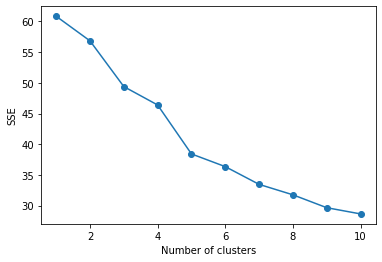

In [27]:
import matplotlib.pyplot as plt #2 7
sse = []
for k in range(1, 11):
    #the result is always the same regardless of parameters used
    kmeans = KMeans(n_clusters=k, n_init=4 ,max_iter=100, random_state=0).fit(salerno_grouped_clustering)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Here I use KMeans to find the clusters

In [28]:
# set number of clusters according to the step above
kclusters = 5

#salerno_grouped_clustering = salerno_grouped.drop('Address', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, max_iter=300, random_state=0).fit(salerno_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10].astype(int) 

In [29]:
salerno_grouped_clustering.head()

,Bakery,Bar,Beach,Bowling Alley,Brazilian Restaurant,Burger Joint,Café,Cocktail Bar,Cupcake Shop,Diner,Electronics Store,Event Space,Furniture / Home Store,Garden,Gastropub,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lounge,Mediterranean Restaurant,Multiplex,Nightclub,Other Great Outdoors,Pizza Place,Plaza,Pub,Record Shop,Restaurant,Sandwich Place,Seafood Restaurant,Soccer Field,Soccer Stadium,Tea Room,Theater,Warehouse Store,Waterfront
0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_.astype(int))

salerno_merged = salerno_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
salerno_merged = salerno_merged.join(neighborhoods_venues_sorted.set_index('Address'), on='Address')#

salerno_merged.head() # check the last columns!

,Venue,Venue Latitude,Venue Longitude,Venue Category,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Lungomare Trieste,40.676798,14.762278,Waterfront,Lungomare Trieste,1,Waterfront,Beach,Ice Cream Shop
1,Bar Nettuno,40.676686,14.762688,Ice Cream Shop,Lungomare Trieste,1,Waterfront,Beach,Ice Cream Shop
2,Criscemunno,40.680445,14.759444,Pizza Place,Via Romualdo II,4,Pizza Place,Waterfront,Electronics Store
3,Osteria Angolo Masuccio,40.677633,14.761259,Italian Restaurant,Via Masuccio Salernitano,3,Italian Restaurant,Ice Cream Shop,Hotel
4,Spiaggia Santa Teresa,40.677569,14.755690,Beach,Lungomare Trieste,1,Waterfront,Beach,Ice Cream Shop


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(salerno_merged['Venue Latitude'], salerno_merged['Venue Longitude'], salerno_merged['Address'], salerno_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Cluster Exploration</h2>

*Cluster 0*

In [32]:
cluster_0 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 0, salerno_merged.columns[[4]
+ list(range(5, salerno_merged.shape[1]))]]

cluster_0

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
43,Via Nuova Raito,0,Hotel,Waterfront,Ice Cream Shop
68,Corso Mazzini,0,Hotel,Waterfront,Ice Cream Shop
69,Via Enrico De Marinis,0,Hotel,Waterfront,Ice Cream Shop
87,Piazza Risorgimento,0,Hotel,Waterfront,Ice Cream Shop


###### *Cluster 1*

In [33]:
cluster_1 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 1, salerno_merged.columns[[4]
+ list(range(5, salerno_merged.shape[1]))]]

cluster_1.drop_duplicates()

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Lungomare Trieste,1,Waterfront,Beach,Ice Cream Shop
6,Vicolo San Giorgio,1,Cocktail Bar,Waterfront,Electronics Store
7,Via Irno,1,Plaza,Waterfront,Hotel
8,Corso Vittorio Emanuele,1,Cocktail Bar,Other Great Outdoors,Waterfront
9,Via Torrione,1,Sandwich Place,Waterfront,Diner
11,Via Antonio Mazza,1,Restaurant,Waterfront,Diner
12,Piazza Flavio Gioia,1,Lounge,Waterfront,Electronics Store
13,Via Roma,1,Ice Cream Shop,Theater,Garden
15,Via Frà Generoso,1,History Museum,Waterfront,Ice Cream Shop
18,Via Scialli,1,Mediterranean Restaurant,Waterfront,Electronics Store


*Cluster 2*

In [34]:
cluster_2 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 2, salerno_merged.columns[[4]
+ list(range(5, salerno_merged.shape[1]))]]
cluster_2

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
31,Piazza Caduti di Brescia,2,Café,Waterfront,Electronics Store
59,Via Vittorio Veneto,2,Café,Waterfront,Electronics Store
71,Via Delle Calabrie,2,Café,Waterfront,Electronics Store


*Cluster 3*

In [35]:
cluster_3 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 3, salerno_merged.columns[[4]
+ list(range(5, salerno_merged.shape[1]))]]
cluster_3.drop_duplicates()

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
3,Via Masuccio Salernitano,3,Italian Restaurant,Ice Cream Shop,Hotel
10,Via Antonio Genovesi,3,Italian Restaurant,Ice Cream Shop,Hotel
40,Via Picenza,3,Italian Restaurant,Ice Cream Shop,Hotel
44,Via Taiani Diego,3,Italian Restaurant,Restaurant,Diner
47,Piazza S.Francesco,3,Italian Restaurant,Ice Cream Shop,Hotel
54,Via Gioacchino Trezza,3,Italian Restaurant,Ice Cream Shop,Hotel
60,Via Sant Andrea,3,Italian Restaurant,Ice Cream Shop,Hotel
72,Corso Principe Amedeo,3,Italian Restaurant,Pizza Place,Electronics Store
75,Via Salvatore Allende,3,Italian Restaurant,Furniture / Home Store,Ice Cream Shop
78,Via Porto,3,Italian Restaurant,Ice Cream Shop,Hotel


*Cluster 4*

In [36]:
cluster_4 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 4, salerno_merged.columns[[4]
+ list(range(5, salerno_merged.shape[1]))]]
cluster_4.drop_duplicates()

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,Via Romualdo II,4,Pizza Place,Waterfront,Electronics Store
5,Piazza Alfano I,4,Pizza Place,Waterfront,Electronics Store
37,Via Pietro del Pezzo,4,Pizza Place,Waterfront,Electronics Store
38,Via Santa Teresa,4,Pizza Place,Waterfront,Electronics Store
39,Lungomare Colombo,4,Pizza Place,Waterfront,Electronics Store
46,Via Matteo Lecce,4,Pizza Place,Waterfront,Electronics Store
50,Via Sant'Eustachio,4,Pizza Place,Waterfront,Electronics Store
52,Via Molina di Vietri,4,Pizza Place,Waterfront,Electronics Store
61,Uscita Autostradale SA-NA,4,Pizza Place,Waterfront,Electronics Store
65,"Via Scavata Case Rosse, 88",4,Pizza Place,Waterfront,Electronics Store


It is pretty straightforward to understand clusters except for Cluster 1 so let's go deeper

In [37]:
salerno_1 = salerno_merged.loc[salerno_merged['Cluster Labels'] == 1]

<AxesSubplot:ylabel='1st Most Common Venue'>

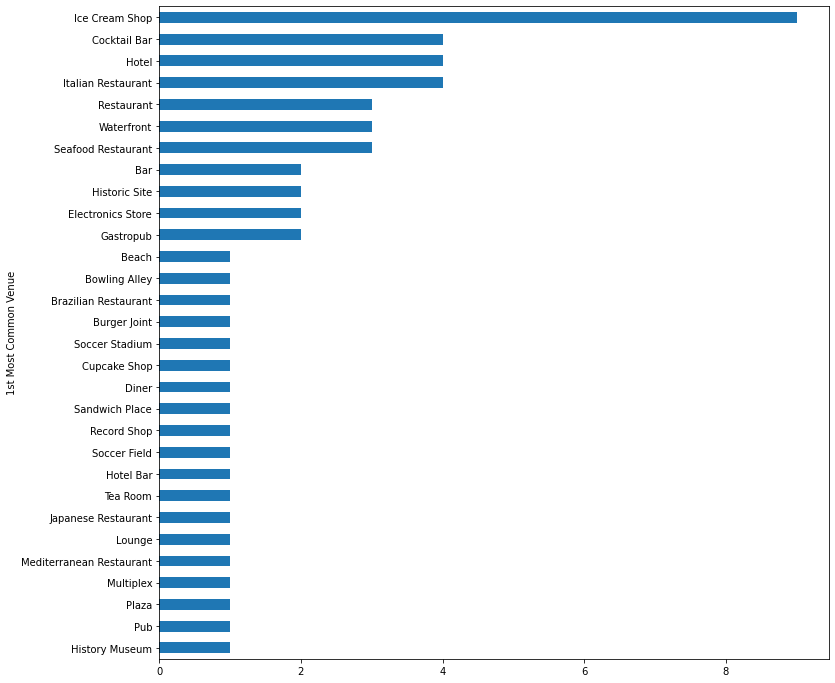

In [38]:
salerno_1.value_counts('1st Most Common Venue',ascending=True).plot(kind='barh',figsize=(12, 12))

<AxesSubplot:ylabel='2nd Most Common Venue'>

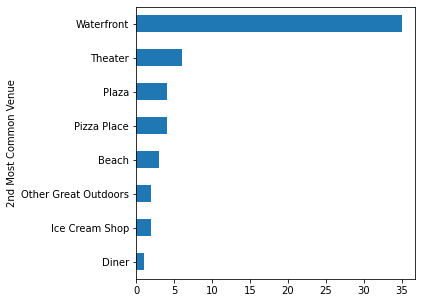

In [39]:
salerno_1.value_counts('2nd Most Common Venue',ascending=True).plot(kind='barh',figsize=(5, 5))

<AxesSubplot:ylabel='3rd Most Common Venue'>

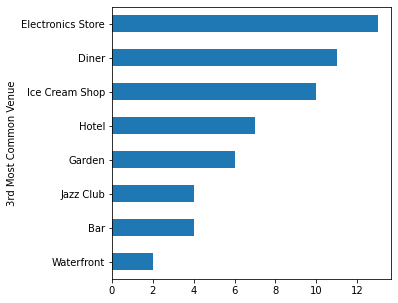

In [40]:
salerno_1.value_counts('3rd Most Common Venue',ascending=True).plot(kind='barh',figsize=(5, 5))

<h6>Quick Recap Table</h6>

_Contains elements which occur as the majority as 1st 2nd and 3rd values,_
_check tables for more detailed information_

<table>
    <thead>
        <tr>
            <th>Cluster 0</th>
            <th>Cluster 1</th>
            <th>Cluster 2</th>
            <th>Cluster 3</th>
            <th>Cluster 4</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Hotel</td>
            <td>Ice Cream Shop</td>
            <td>Cafè</td>
            <td>Italian Restaurant</td>
            <td>Pizza Place</td>    
        </tr>
        <tr>
            <td>Waterfront</td>
            <td>Waterfront</td>
            <td>Waterfront</td>
            <td>Hotel</td>
            <td>Waterfront</td>
        </tr>
        <tr>
            <td>Ice Cream Shop</td>
            <td>Electronic Store</td>
            <td>Electronic Store</td>
            <td>Hotel</td>
            <td>Electronic Store</td>
        </tr>
    </tbody>
</table>